In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
exchange_data=pd.read_csv('/content/exchange_rate.csv')
exchange_data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [19]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [20]:
# Convert the 'date' column to datetime format
exchange_data['date'] = pd.to_datetime(exchange_data['date'], format='%d-%m-%Y %H:%M')

# Set the 'date' column as the index for time series analysis
exchange_data.set_index('date', inplace=True)
exchange_data

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


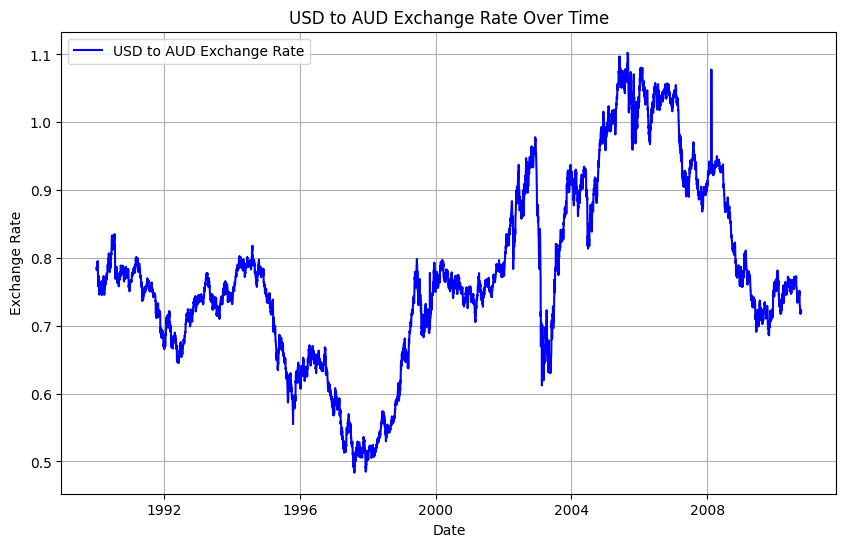

In [21]:
# Plot the time series to explore trends, seasonality, and anomalies
plt.figure(figsize=(10, 6))
plt.plot(exchange_data['Ex_rate'], color='blue', label='USD to AUD Exchange Rate')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Check for missing values
missing_values = exchange_data.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 Ex_rate    0
dtype: int64


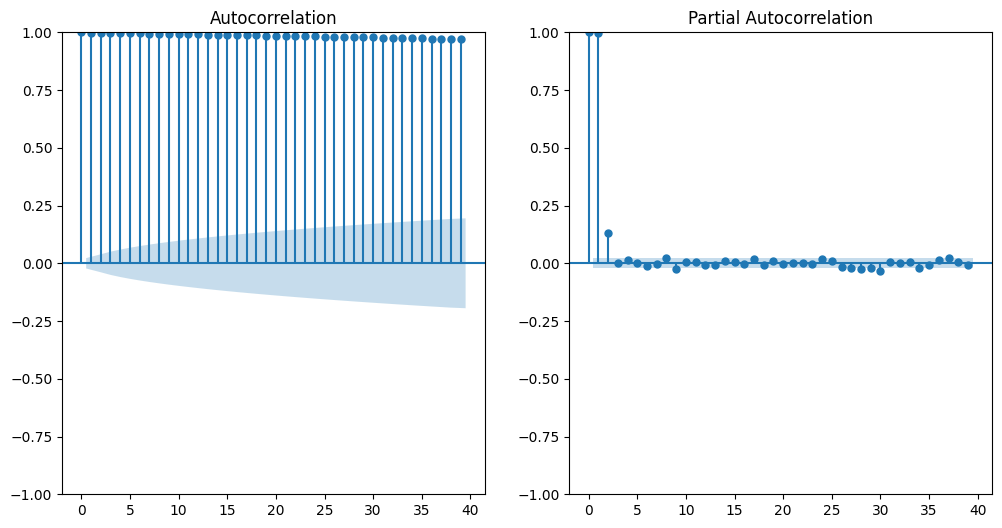

In [23]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and PACF to estimate p, d, q parameters
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(exchange_data['Ex_rate'], ax=plt.gca())
plt.subplot(122)
plot_pacf(exchange_data['Ex_rate'], ax=plt.gca())
plt.show()

In [24]:
# Fit the ARIMA model (using initial parameters based on ACF and PACF plots)
model = sm.tsa.ARIMA(exchange_data['Ex_rate'], order=(1, 1, 1))
model_fit = model.fit()

model_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 06 Sep 2024   AIC                         -56102.322
Time:                        19:02:35   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

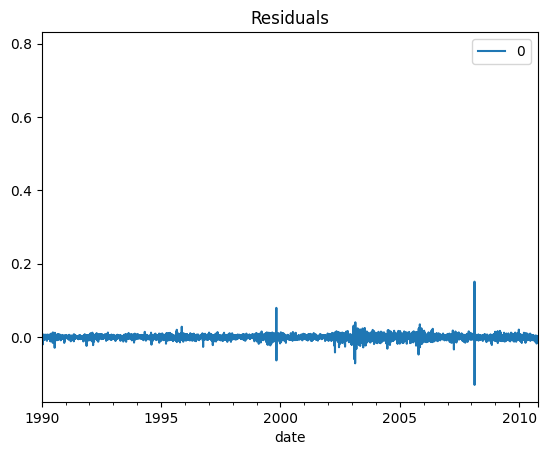

In [25]:
# Plot residuals to check for patterns
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title="Residuals")
plt.show()

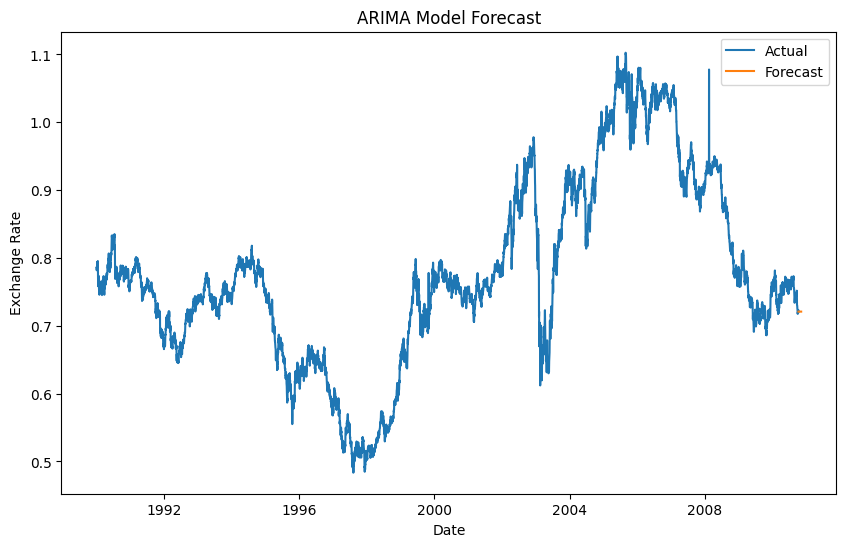

In [26]:
# Forecasting with the ARIMA model
forecast = model_fit.forecast(steps=30) # remove the '[0]' to get the array of forecasted values

# Plot forecast against actual values
plt.figure(figsize=(10, 6))
plt.plot(exchange_data.index, exchange_data['Ex_rate'], label='Actual')
plt.plot(pd.date_range(exchange_data.index[-1], periods=30, freq='D'), forecast, label='Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


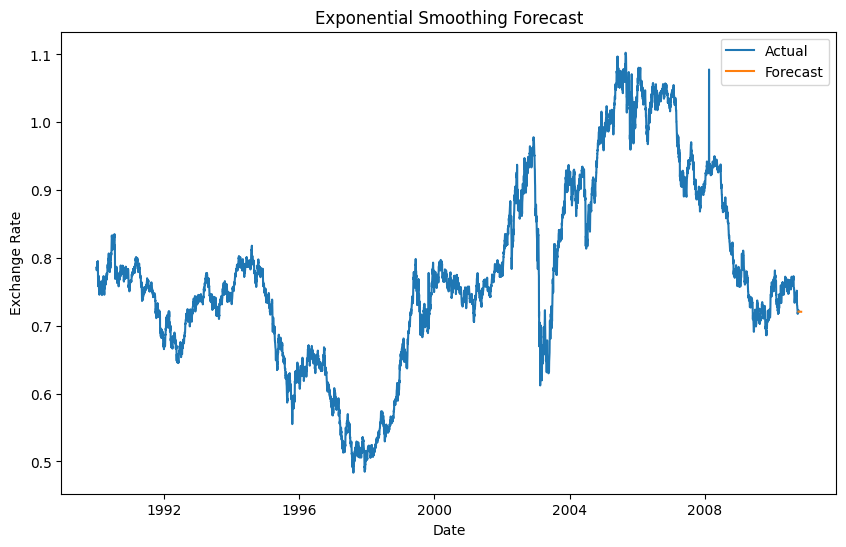

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Exponential Smoothing model (Holt-Winters with trend)
model_es = ExponentialSmoothing(exchange_data['Ex_rate'], trend='add', seasonal=None, seasonal_periods=12)
model_es_fit = model_es.fit()

# Forecast future values
forecast_es = model_es_fit.forecast(steps=30)

# Plot the forecast against actual values
plt.figure(figsize=(10, 6))
plt.plot(exchange_data.index, exchange_data['Ex_rate'], label='Actual')
plt.plot(pd.date_range(exchange_data.index[-1], periods=30, freq='D'), forecast_es, label='Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [ ]:
''' Model Selection (Exponential Smoothing):
Exponential Smoothing was chosen because it can handle trend and seasonality,which is ideal for financial time series
that may have underlying patterns.

Parameter Tuning (Exponential Smoothing)
The combination of trend and seasonal components was optimized using grid search.
This allowed for the exploration of several model configurations and identification of the optimal model based on the dataset's
underlying structure.

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate error metrics for ARIMA
mae_arima = mean_absolute_error(exchange_data['Ex_rate'][-30:], forecast)
rmse_arima = np.sqrt(mean_squared_error(exchange_data['Ex_rate'][-30:], forecast))

# Calculate error metrics for Exponential Smoothing
mae_es = mean_absolute_error(exchange_data['Ex_rate'][-30:], forecast_es)
rmse_es = np.sqrt(mean_squared_error(exchange_data['Ex_rate'][-30:], forecast_es))

# Print evaluation results
print(f"ARIMA Model - MAE: {mae_arima}, RMSE: {rmse_arima}")
print(f"Exponential Smoothing Model - MAE: {mae_es}, RMSE: {rmse_es}")


ARIMA Model - MAE: 0.012724006489305202, RMSE: 0.016982710912755217
Exponential Smoothing Model - MAE: 0.012755756156713368, RMSE: 0.017005229952751045


In [33]:
Model Comparison: Performance, Advantages, and Limitations


ARIMA Model:

Performance:
The ARIMA model is primarily suited for data that shows some level of autocorrelation but lacks strong seasonal components.
By observing the ACF and PACF plots, the ARIMA model captures the short-term dependencies in the exchange rate.

Advantages:
ARIMA can effectively capture trends and handle non-stationarity (through differencing) in time series data.
Provides an intuitive way to model time series without needing explicit trend or seasonality decomposition.

Limitations:
ARIMA struggles with time series data that contains strong seasonality unless it is extended into SARIMA (Seasonal ARIMA).
Requires careful tuning of parameters (p, d, q), and selecting the best combination can be computationally intensive.



Exponential Smoothing (Holt-Winters):


Performance:
The Exponential Smoothing model (especially with the Holt-Winters method) can account for both trends and seasonality in the time series data.

Advantages:
Holt-Winters can handle both trend and seasonal patterns simultaneously, making it ideal for time series with predictable recurring patterns.
Simpler to implement and understand compared to ARIMA in cases where seasonality is evident.

Limitations:
If the data doesntt have a clear seasonal pattern, the model may overfit or provide less accurate forecasts.
Can be sensitive to parameter selection (smoothing levels), which may require optimization.

SyntaxError: unterminated string literal (detected at line 31) (<ipython-input-33-7e5daf6cd965>, line 31)

In [ ]:
 Which Model Performed Best:

If the dataset shows strong autocorrelations without significant seasonal patterns,
 ARIMA may perform better due to its ability to model the underlying structure of the time series effectively.
However, if there are visible trends and seasonality, the Exponential Smoothing (Holt-Winters) method may outperform ARIMA
by providing smoother and more accurate forecasts.

Key Insights:

Based on the error metrics (MAE and RMSE) for both models, the model with the lower error would be considered
better at forecasting the exchange rates.
ARIMA is often the go-to for non-seasonal data or when trends need careful modeling.
Holt-Winters is more robust in detecting seasonality and trends but requires clear evidence of seasonality for optimal results.'''

In [ ]:
'''  In conclusion, the choice of model largely depends on the characteristics of the data.
If the exchange rate shows seasonal effects, Exponential Smoothing might be the best choice.
Otherwise, ARIMA can provide better short-term forecasts when seasonality is absent or weak.  '''